In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()


In [33]:
data = pd.read_csv(r'C:\Users\olugbenle enoch\Desktop\data_for_uci_named.csv')

In [34]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [35]:
data.drop('stab', axis = 1, inplace = True)

In [5]:
v = data.drop('stabf', axis = 1)

In [6]:
v.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder_data = LabelEncoder()
data['stabf'] = labelencoder_data.fit_transform(data['stabf'])

In [37]:
X= data.drop(['stabf'], axis=1)
y = data['stabf']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddata = scaler.fit_transform(X_train)
scaleddata1 = scaler.transform(X_test)
xtrainscaled = pd.DataFrame(scaleddata, columns = X_train.columns) 
xtestscaled = pd.DataFrame(scaleddata1, columns = X_test.columns) 

In [39]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 1, n_estimators=100)
classifier.fit(xtrainscaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
# fit model no training data
model33 = XGBClassifier(learning_rate = 0.1, max_depth= 3, random_state = 1)
model33.fit(xtrainscaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier 
etc = ExtraTreesClassifier(random_state = 1, n_estimators=100)
etcmodel = etc.fit(xtrainscaled, y_train)

In [55]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = 1)
lgbm.fit(xtrainscaled, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators =[50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]


In [57]:
hyperparameter_grid = {'n_estimators': n_estimators,
                      'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'max_features': max_features}

In [58]:
clf = RandomizedSearchCV(ExtraTreesClassifier(random_state = 1), hyperparameter_grid, random_state = 1, verbose = True)

In [59]:
clf.fit(xtrainscaled, y_train)

C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [50, 100, 300, 500, 1000], 'min_samples_split': [2, 3, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [60]:
pred = classifier.predict(xtestscaled)
pred1 = model33.predict(xtestscaled)
pred2= etcmodel.predict(xtestscaled)
pred3= lgbm.predict(xtestscaled)
pred4 = clf.predict(xtestscaled)


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9191    0.8778    0.8980       712
           1     0.9341    0.9573    0.9456      1288

   micro avg     0.9290    0.9290    0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [62]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Precision: ", metrics.precision_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))

Accuracy:  0.929
Precision:  0.9340909090909091
Recall:  0.9572981366459627


In [63]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred1))
print("Precision: ", metrics.precision_score(y_test, pred1))
print("Recall: ", metrics.recall_score(y_test, pred1))

Accuracy:  0.9195
Precision:  0.9189591078066914
Recall:  0.9596273291925466


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1, digits = 4))

              precision    recall  f1-score   support

           0     0.9206    0.8469    0.8822       712
           1     0.9190    0.9596    0.9389      1288

   micro avg     0.9195    0.9195    0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.9195

In [66]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred2))
print("Precision: ", metrics.precision_score(y_test, pred2))
print("Recall: ", metrics.recall_score(y_test, pred2))

Accuracy:  0.928
Precision:  0.9218289085545722
Recall:  0.9704968944099379


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2, digits = 4))

              precision    recall  f1-score   support

           0     0.9410    0.8511    0.8938       712
           1     0.9218    0.9705    0.9455      1288

   micro avg     0.9280    0.9280    0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [68]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred3))
print("Precision: ", metrics.precision_score(y_test, pred3))
print("Recall: ", metrics.recall_score(y_test, pred3))

Accuracy:  0.9375
Precision:  0.9415337889141989
Recall:  0.9627329192546584


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3, digits = 4))

              precision    recall  f1-score   support

           0     0.9297    0.8919    0.9104       712
           1     0.9415    0.9627    0.9520      1288

   micro avg     0.9375    0.9375    0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [70]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred4))
print("Precision: ", metrics.precision_score(y_test, pred4))
print("Recall: ", metrics.recall_score(y_test, pred4))

Accuracy:  0.927
Precision:  0.9299698795180723
Recall:  0.9588509316770186


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred4, digits = 4))

              precision    recall  f1-score   support

           0     0.9211    0.8694    0.8945       712
           1     0.9300    0.9589    0.9442      1288

   micro avg     0.9270    0.9270    0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



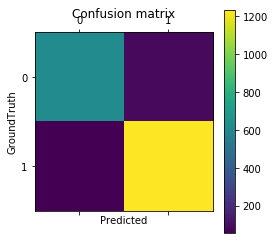

[[ 625   87]
 [  55 1233]]


In [50]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y_test,pred,"conf")

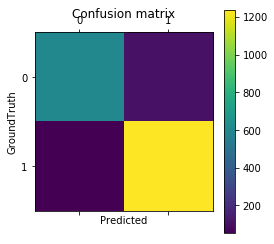

[[ 603  109]
 [  52 1236]]


In [51]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, pred1)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y_test,pred1,"conf")

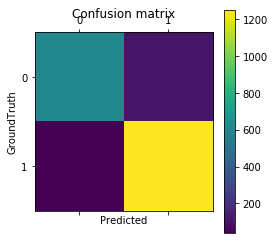

[[ 606  106]
 [  38 1250]]


In [52]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, pred2)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y_test,pred2,"conf")

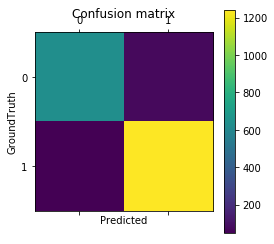

[[ 635   77]
 [  48 1240]]


In [72]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y_test,pred3,"conf")

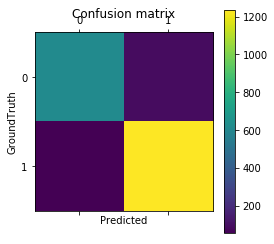

[[ 619   93]
 [  53 1235]]


In [73]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y_test,pred4,"conf")

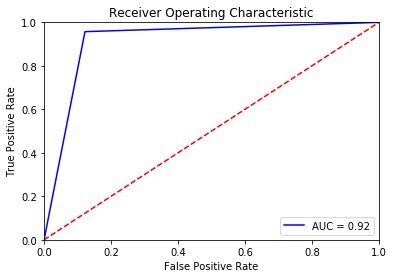

In [75]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:

# linear regression feature importance

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# get importance
importance = clf.coef
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'RandomizedSearchCV' object has no attribute 'coef'